# Case studies part 1

In [109]:
import numpy
import pandas
from scipy.optimize import curve_fit

from matplotlib import pyplot

%matplotlib inline
%config InlineBackend.figure_format = "retina"

import modsim

### Historical World Population

In [2]:
filename = "World_population_estimates.html"
tables = pandas.read_html(
    filename,
    header=0,
    index_col=0,
    decimal='M',
)

table_1 = tables[1]
table_1.columns = [
    "PRB", "UN", "Maddison", "Hyde", "Tanton", "Biraben", "McEvedy", "Thomlinson", "Durand", "Clark",
]

In [3]:
table_1.head()

,PRB,UN,Maddison,Hyde,Tanton,Biraben,McEvedy,Thomlinson,Durand,Clark
Year,,,,,,,,,,
-10000,NaN,NaN,NaN,2M[24],NaN,NaN,4.0,1–10M,NaN,NaN
-9000,NaN,NaN,NaN,4.,NaN,NaN,NaN,NaN,NaN,NaN
-8000,5.,NaN,NaN,5.,NaN,NaN,NaN,NaN,5–10M,NaN
-7000,NaN,NaN,NaN,8.,NaN,NaN,NaN,NaN,NaN,NaN
-6000,NaN,NaN,NaN,11.,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
table_1.tail()

,PRB,UN,Maddison,Hyde,Tanton,Biraben,McEvedy,Thomlinson,Durand,Clark
Year,,,,,,,,,,
1913,NaN,NaN,1793.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,NaN,1860.0,1863.,1912.,NaN,NaN,NaN,NaN,NaN,1968.
1925,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,NaN,NaN
1930,NaN,2070.0,NaN,2092.,NaN,NaN,NaN,NaN,NaN,2145.
1940,NaN,2300.0,2299.,2307.,NaN,NaN,NaN,NaN,NaN,2340.


In [5]:
table_1_0_1940 = table_1.loc["1":table_1.index[-1]]
table_1_0_1940.head()

,PRB,UN,Maddison,Hyde,Tanton,Biraben,McEvedy,Thomlinson,Durand,Clark
Year,,,,,,,,,,
1,300M[25],300.0,231M[26],188M[24],150.0,255.0,170.0,200.,270–330M,256M[27]
100,NaN,NaN,NaN,195.,NaN,NaN,NaN,NaN,NaN,NaN
200,NaN,NaN,NaN,202.,NaN,256.0,190.0,NaN,NaN,NaN
300,NaN,NaN,NaN,205.,NaN,NaN,NaN,NaN,NaN,NaN
350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.


In [6]:
table_1_0_1940.head()

,PRB,UN,Maddison,Hyde,Tanton,Biraben,McEvedy,Thomlinson,Durand,Clark
Year,,,,,,,,,,
1,300M[25],300.0,231M[26],188M[24],150.0,255.0,170.0,200.,270–330M,256M[27]
100,NaN,NaN,NaN,195.,NaN,NaN,NaN,NaN,NaN,NaN
200,NaN,NaN,NaN,202.,NaN,256.0,190.0,NaN,NaN,NaN
300,NaN,NaN,NaN,205.,NaN,NaN,NaN,NaN,NaN,NaN
350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.


In [7]:
table_1_0_1940.tail()

,PRB,UN,Maddison,Hyde,Tanton,Biraben,McEvedy,Thomlinson,Durand,Clark
Year,,,,,,,,,,
1913,NaN,NaN,1793.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,NaN,1860.0,1863.,1912.,NaN,NaN,NaN,NaN,NaN,1968.
1925,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,NaN,NaN
1930,NaN,2070.0,NaN,2092.,NaN,NaN,NaN,NaN,NaN,2145.
1940,NaN,2300.0,2299.,2307.,NaN,NaN,NaN,NaN,NaN,2340.


In [8]:
table_1_0_1940

,PRB,UN,Maddison,Hyde,Tanton,Biraben,McEvedy,Thomlinson,Durand,Clark
Year,,,,,,,,,,
1,300M[25],300.0,231M[26],188M[24],150.0,255.0,170.0,200.,270–330M,256M[27]
100,NaN,NaN,NaN,195.,NaN,NaN,NaN,NaN,NaN,NaN
200,NaN,NaN,NaN,202.,NaN,256.0,190.0,NaN,NaN,NaN
300,NaN,NaN,NaN,205.,NaN,NaN,NaN,NaN,NaN,NaN
350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.
400,NaN,NaN,NaN,209.,NaN,206.0,190.0,NaN,NaN,NaN
500,NaN,NaN,NaN,210M[24],NaN,206.0,190.0,NaN,NaN,NaN
600,NaN,NaN,NaN,213.,NaN,206.0,200.0,NaN,NaN,237.
700,NaN,NaN,NaN,226.,NaN,207.0,210.0,NaN,NaN,NaN


In [9]:
def str2num(df):
    # remove all characters after "M"
    # df['column1'].str.replace("M.*", "", regex=True)
    # remove all non-numeric characters
    # table_1_0_1940.PRB.str.replace("\D+", "", regex=True)
    df_ = pandas.DataFrame()
    for c in df.columns:
        df_[c] = df[c].replace("–", "M", regex=True)
        df_[c].replace("M.*", "", regex=True, inplace=True)
        #df_[c].replace("\-.*", "", regex=True, inplace=True)
        df_[c].replace("\D+", "", regex=True, inplace=True)
        #table_1_0_1940.PRB.astype(float)
    return df_.astype(float)

In [10]:
table1 = str2num(table_1_0_1940)

In [11]:
table1.head()

,PRB,UN,Maddison,Hyde,Tanton,Biraben,McEvedy,Thomlinson,Durand,Clark
Year,,,,,,,,,,
1,300.0,300.0,231.0,188.0,150.0,255.0,170.0,200.0,270.0,256.0
100,NaN,NaN,NaN,195.0,NaN,NaN,NaN,NaN,NaN,NaN
200,NaN,NaN,NaN,202.0,NaN,256.0,190.0,NaN,NaN,NaN
300,NaN,NaN,NaN,205.0,NaN,NaN,NaN,NaN,NaN,NaN
350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0


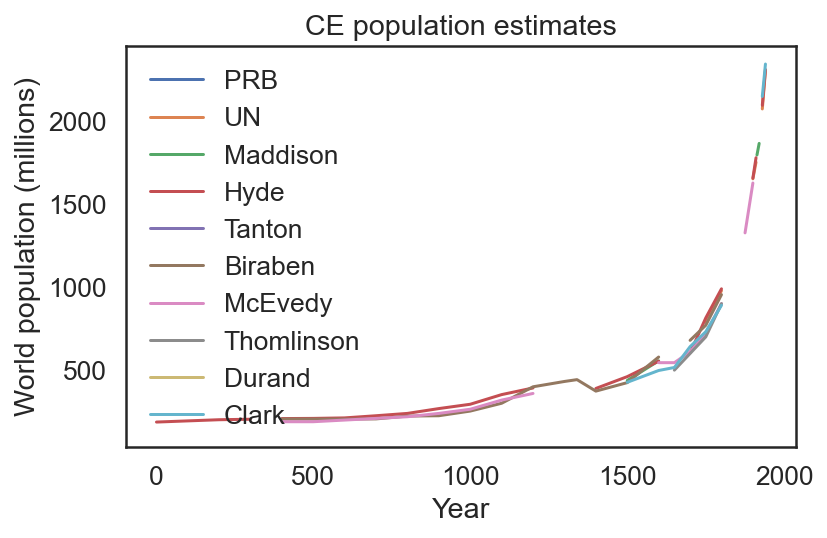

In [12]:
table1.plot()
modsim.decorate(xlabel='Year', 
         ylabel='World population (millions)',
         title='CE population estimates')

In [26]:
def linear_growth(t, pop, system):
    return system.alpha * pop


def quad_growth(t, pop, system):
    return system.alpha * pop + system.beta * pop**2


def logistic_growth(t, pop, system):
    K = system.pop_end
    r = system.alpha
    return K / (1.0 + system.A * numpy.exp(-r*t))


def logistic_growth_pop(t, pop, system):
    K = system.pop_end
    r = system.alpha
    return K / (1.0 + system.A * numpy.exp(-r*pop))

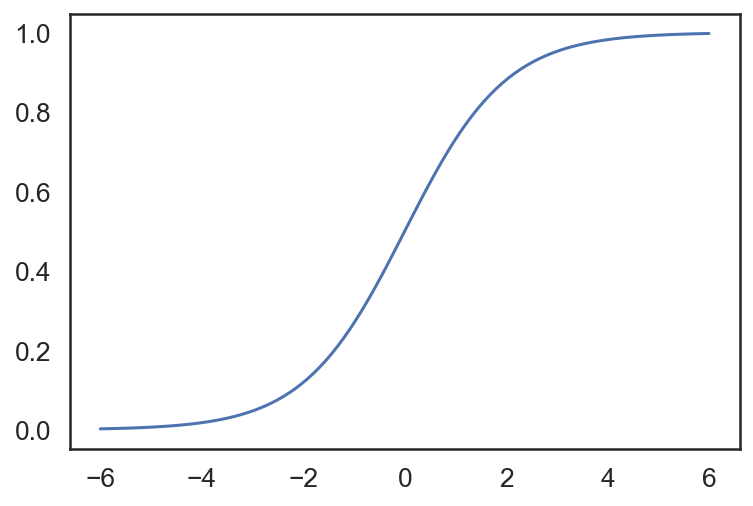

In [14]:
t = numpy.linspace(-6, 6, 101)
system_y = modsim.State(alpha=1, beta=0.0018, A=1, pop_end=1)
y = logistic_growth(t, 0, system_y)
pyplot.plot(t, y)

In [15]:
def run_simulation(system, growth_func):
    results = modsim.TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in range(int(system.t_0), int(system.t_end)):
        growth = growth_func(t, results[t], system)
        results[t+1] = results[t] + growth
        
    return results

In [16]:
pop_max, pop_min = table1.max().max(), table1.min().min()

t_0, t_end = table1.index[[0, -1]]

t_0, t_end, pop_min, pop_max

(1, 1940, 150.0, 2340.0)

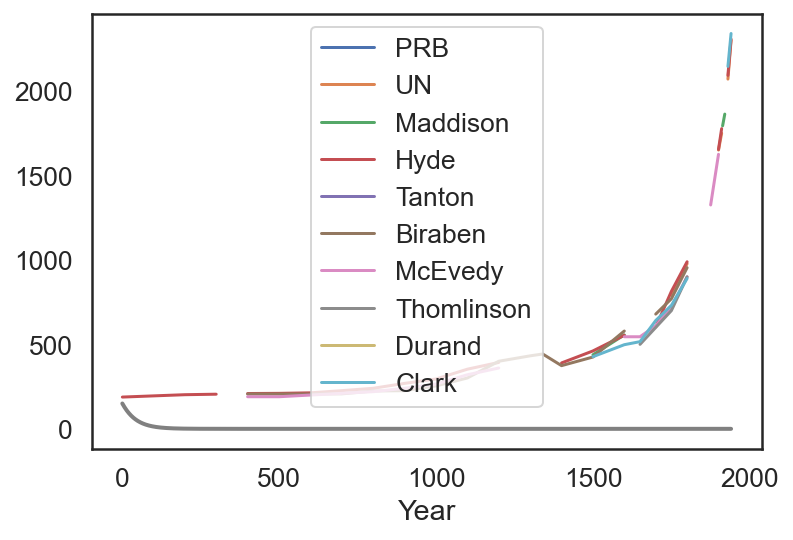

In [17]:
system1 = modsim.System(
    t_0 = t_0,
    p_0 = pop_min,
    t_end = t_end,
    pop_end = pop_max,
    alpha = -0.025,
    beta = 0.000018,
)

results_quad = run_simulation(system1, quad_growth)

table1.plot()
results_quad.plot(color='gray', label='model')
#plot_estimates()
#modsim.decorate(title='Quadratic Growth Model')

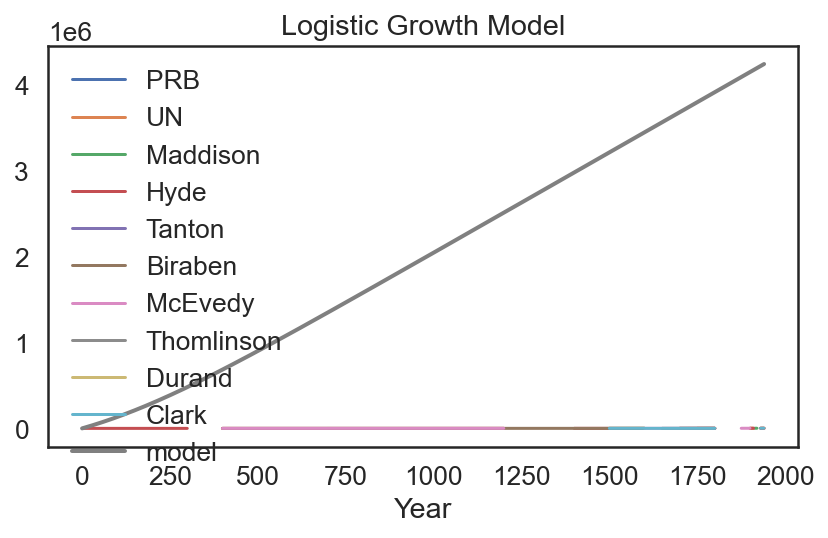

In [43]:
system2 = modsim.System(
    t_0 = t_0,
    p_0 = pop_min,
    t_end = t_end,
    pop_end = pop_max,
    alpha = 0.0055,
    A = 1,
)

results_logistic = run_simulation(system2, logistic_growth)

table1.plot()
results_logistic.plot(color='gray', label="model")
#plot_estimates()
modsim.decorate(title='Logistic Growth Model')

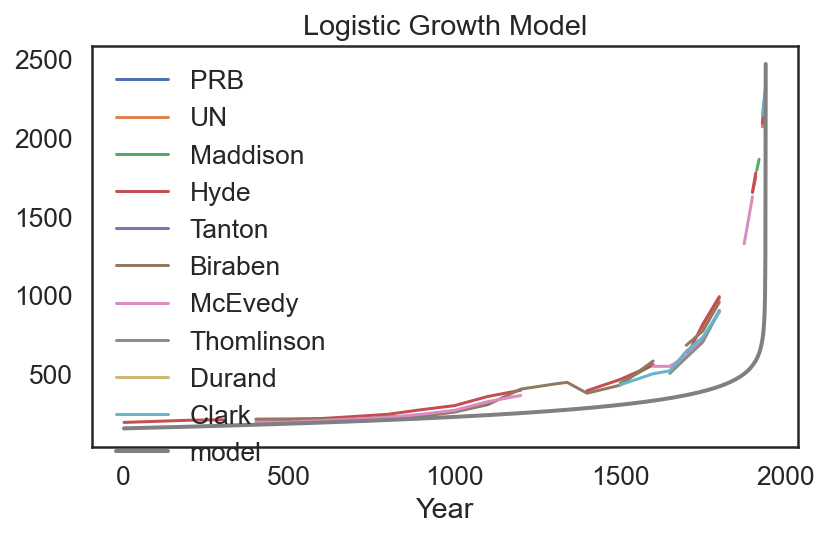

In [108]:
system2_ = modsim.System(
    t_0 = t_0,
    p_0 = pop_min,
    t_end = t_end,
    pop_end = pop_max,
    alpha = 0.009946,
    A = 200000,
)

results_logistic_ = run_simulation(system2_, logistic_growth_pop)

table1.plot()
results_logistic_.plot(color='gray', label="model")
#plot_estimates()
modsim.decorate(title='Logistic Growth Model')

In [19]:
def exp_growth(t, pop, system):
    K = system.p_0
    r = system.alpha
    return K + system.A * numpy.exp(-r*t)

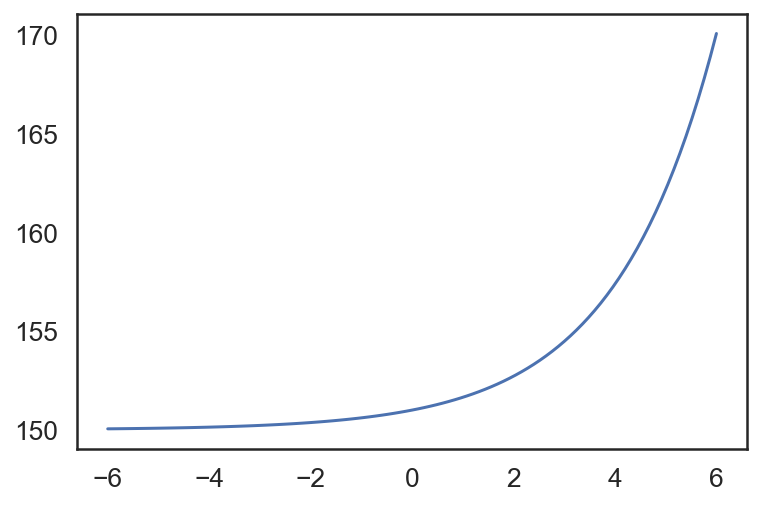

In [20]:
system_y.p_0 = pop_min
system_y.alpha=-0.5
y = exp_growth(t, 1, system_y)
pyplot.plot(t, y)

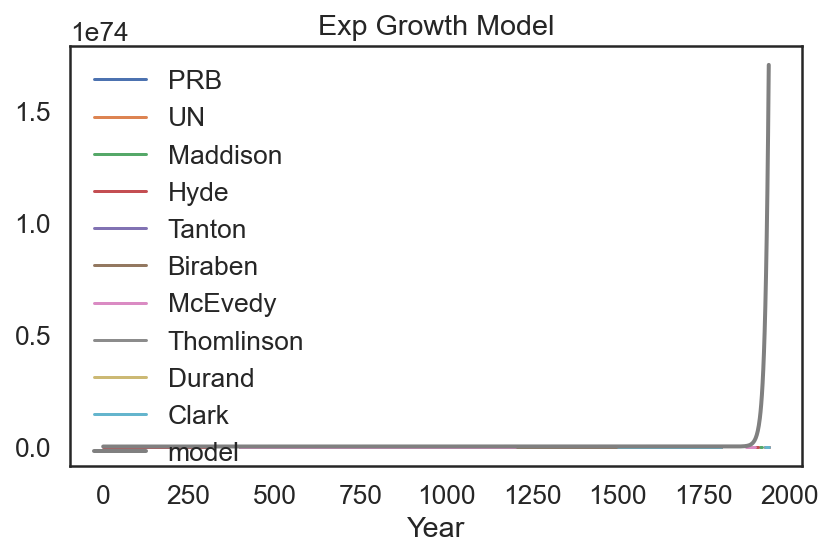

In [157]:
system3 = modsim.System(
    t_0 = t_0,
    p_0 = pop_min,
    t_end = t_end,
    pop_end = pop_max,
    alpha = -0.1,
    A = 0.00000000001,
)

results_exp = run_simulation(system3, exp_growth)

table1.plot()
results_exp.plot(color='gray', label="model")
#plot_estimates()
modsim.decorate(title='Exp Growth Model')

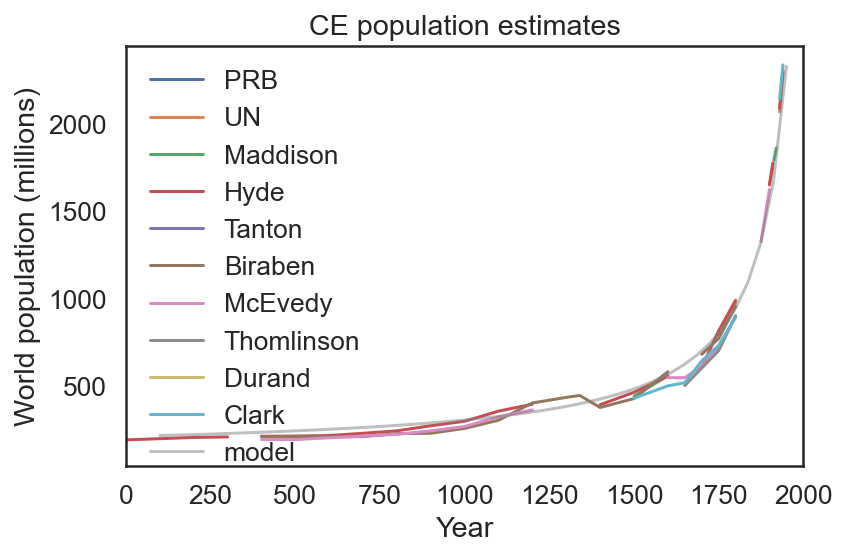

In [160]:
# Solution

# The function I found that best matches the data has the form
# a + b / (c - x)

# This function is hard to explain physically; that is, it doesn't
# correspond to a growth model that makes sense in terms of human 
# behavior.

# And it implies that the population goes to infinity in 2040.

xs = numpy.linspace(100, 1950)
ys = 110 + 200000 / (2040 - xs)
table1.plot()
pyplot.plot(xs, ys, color='gray', alpha=0.5, label='model')

modsim.decorate(xlim=[0, 2000], xlabel='Year', 
         ylabel='World population (millions)',
         title='CE population estimates')

In [22]:
df = pandas.DataFrame({"column1" : ['a{-...}', 'b{-...}', 'c{-...}', 'd{-...}']})
df

,column1
0,a{-...}
1,b{-...}
2,c{-...}
3,d{-...}


In [23]:
# remove between bracets
df['column1'].replace("\{.*\}","", regex=True)

0    a
1    b
2    c
3    d
Name: column1, dtype: object